# Avocado Project

### Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 &amp; compiled
into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and
price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales
of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet
reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar
and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost,
even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of
avocados (e.g. greenskins) are not included in this table.

#### Some relevant columns in the dataset:

 Date - The date of the observation

 AveragePrice - the average price of a single avocado

 type - conventional or organic

 year - the year

 Region - the city or region of the observation

 Total Volume - Total number of avocados sold

 4046 - Total number of avocados with PLU 4046 sold

 4225 - Total number of avocados with PLU 4225 sold

 4770 - Total number of avocados with PLU 4770 sold

#### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 



#### Importing required libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Lab-of-Infinity/Datatrained-Projects/main/Evaluation%20Project%203%20Avacado%20Project/avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.shape

(18249, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Check for repeated or duplicated for dataset

In [8]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Length: 18249, dtype: bool>

This dataset does not contain any duplicate values.

# Missing value check 

In [9]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

So, there are no missing values in the dataset.

<Axes: >

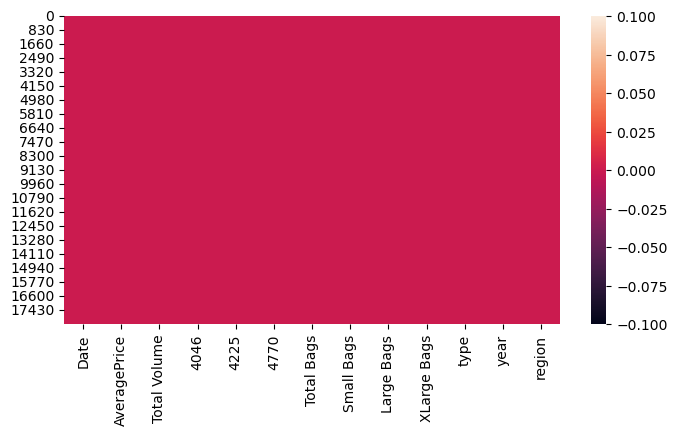

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


. The dataset has 13 features.

. Date bydefault datatype is object but we have to change it into datetype datatype.

. Region has object datatype and other features are int and float datatype.

In [12]:
# Converting datatype of Date column
df['Date']=pd.to_datetime(df.Date)
df['Date'].dtype

dtype('<M8[ns]')

<Axes: >

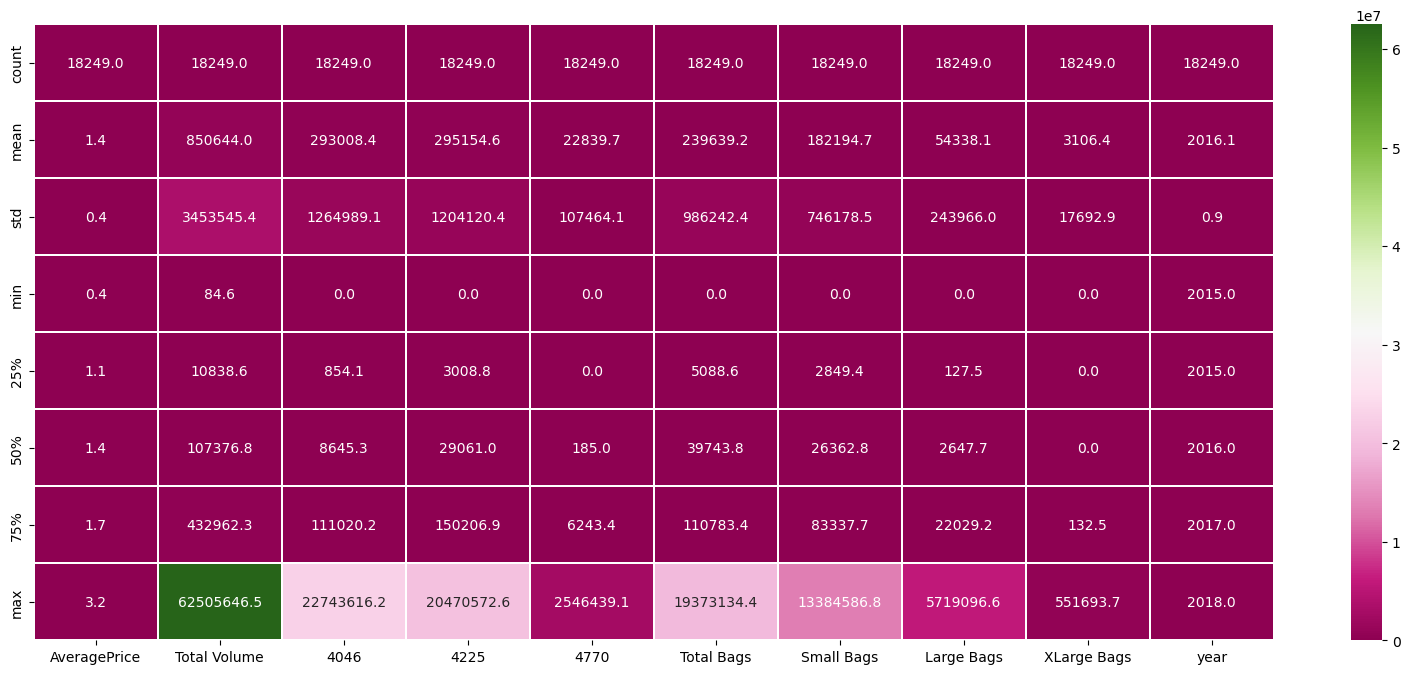

In [13]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')


In [14]:
df.describe().round()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0
mean,1.0,850644.0,293008.0,295155.0,22840.0,239639.0,182195.0,54338.0,3106.0,2016.0
std,0.0,3453545.0,1264989.0,1204120.0,107464.0,986242.0,746179.0,243966.0,17693.0,1.0
min,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0
25%,1.0,10839.0,854.0,3009.0,0.0,5089.0,2849.0,127.0,0.0,2015.0
50%,1.0,107377.0,8645.0,29061.0,185.0,39744.0,26363.0,2648.0,0.0,2016.0
75%,2.0,432962.0,111020.0,150207.0,6243.0,110783.0,83338.0,22029.0,132.0,2017.0
max,3.0,62505647.0,22743616.0,20470573.0,2546439.0,19373134.0,13384587.0,5719097.0,551694.0,2018.0


From above we can see that some of the features have outliers after looking at 50% and max columns and for most of the columns the min value is zero.
For most of the columns the mean value is greater than median so data is right skewed.




In [15]:
# Let's do some statitical analysis on Average price
print('Minimum Price Of Avocado :', df.AveragePrice.min(),'USD')
print('Maximum Price of Avocado :', df.AveragePrice.max(),'USD')
print('Average Price of Avocado :', df.AveragePrice.mean(),'USD')



Minimum Price Of Avocado : 0.44 USD
Maximum Price of Avocado : 3.25 USD
Average Price of Avocado : 1.405978409775878 USD


<Axes: title={'center': 'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

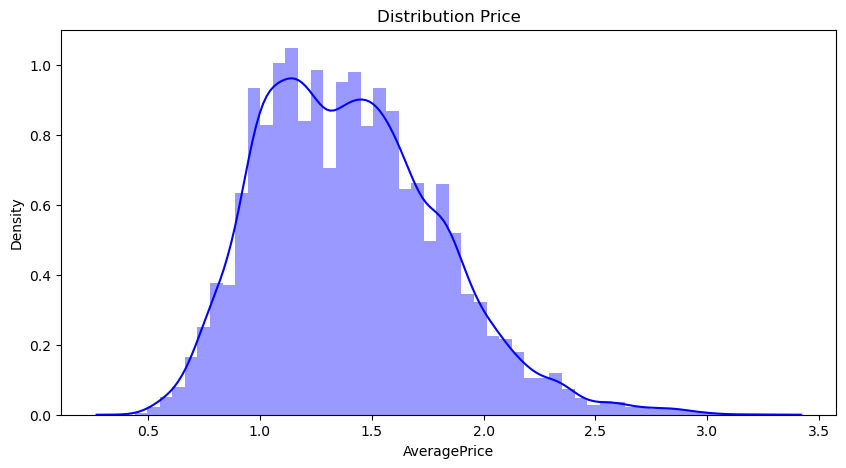

In [16]:
plt.figure(figsize=(10,5))
plt.title('Distribution Price')
sns.distplot(df["AveragePrice"], color='b')

In [17]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [18]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [19]:
print('percentage Difference in Price of Avocado : ',((1.65399-1.1580)/1.1580)*100,"%")

percentage Difference in Price of Avocado :  42.831606217616596 %


<Axes: xlabel='AveragePrice', ylabel='type'>

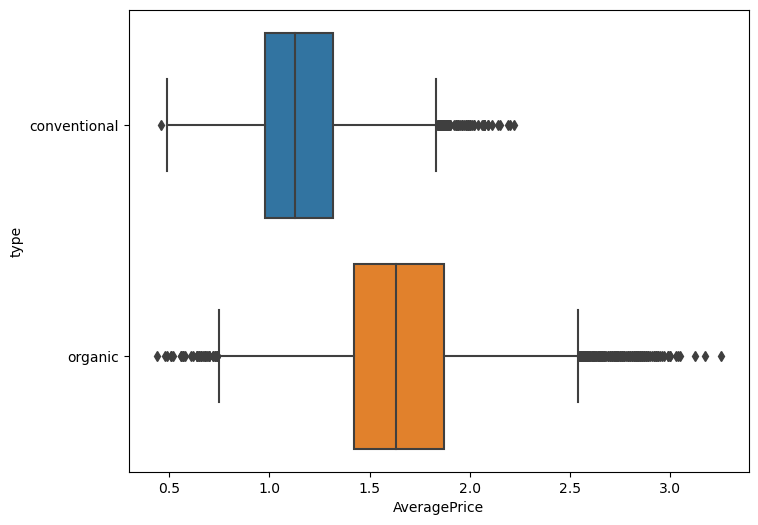

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x='AveragePrice',y='type',data=df)

. Organic avocado is approximately 43% more costlier than conventional Avocado. 
. We can see that Average price of Organic Avocado is more than the Conventional Avocado.
.

In [21]:
df.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

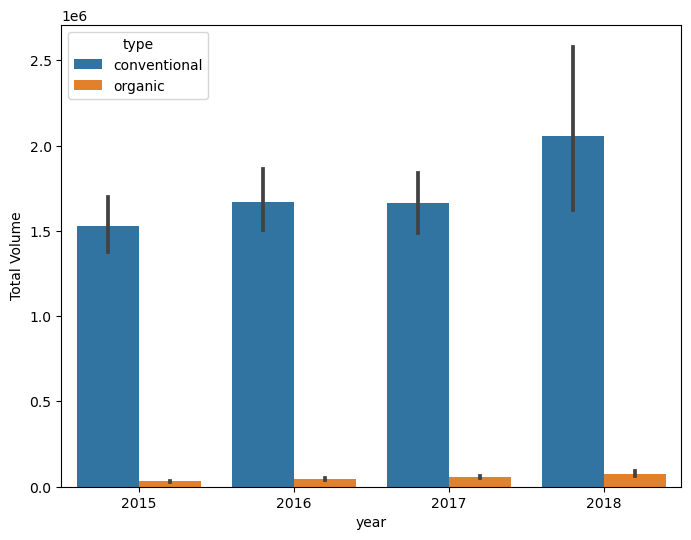

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x='year',y='Total Volume',hue='type',data=df)
plt.show()

#### Conventioinal Avocado are in more demand than Organic avocado and Average price varies over year and season.


In [26]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

. Organic Avocado is more costlier than conventional avocado.

.Except 2017 every year there is increase in the price of Avocado and there is price hike over the year.

In [29]:
df.groupby(['year','type'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

. There is growth in demand of conventional type  avocado year-wise but rate of growth of demand is less than organic avocado comparetively maybe people become more health oriented.

.Sales of avocado in 2017 is more than 2016 so price hike is maybe as aresult of increae of demand or some supply chain issue.


In [30]:
df.sort_values(by=['Date'],inplace =True,ascending=True)

In [31]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])


,Total Volume,AveragePrice
,sum,sum
region,,
Albany,1.606780e+07,527.63
Atlanta,8.860512e+07,452.23
BaltimoreWashington,1.347139e+08,518.57
Boise,1.441319e+07,455.67
Boston,9.727398e+07,517.44
BuffaloRochester,2.296247e+07,512.69
California,1.028982e+09,471.62
Charlotte,3.555554e+07,542.84


In [32]:
df1=df.copy()

In [33]:
# Creating dataframe for numeric features
df1.drop(['Date','type','region','year'],axis=1,inplace=True)
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
11569,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00
9593,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00
10009,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00
1819,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00
9333,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00
...,...,...,...,...,...,...,...,...,...
8574,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59
9018,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63
18141,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00
17673,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00


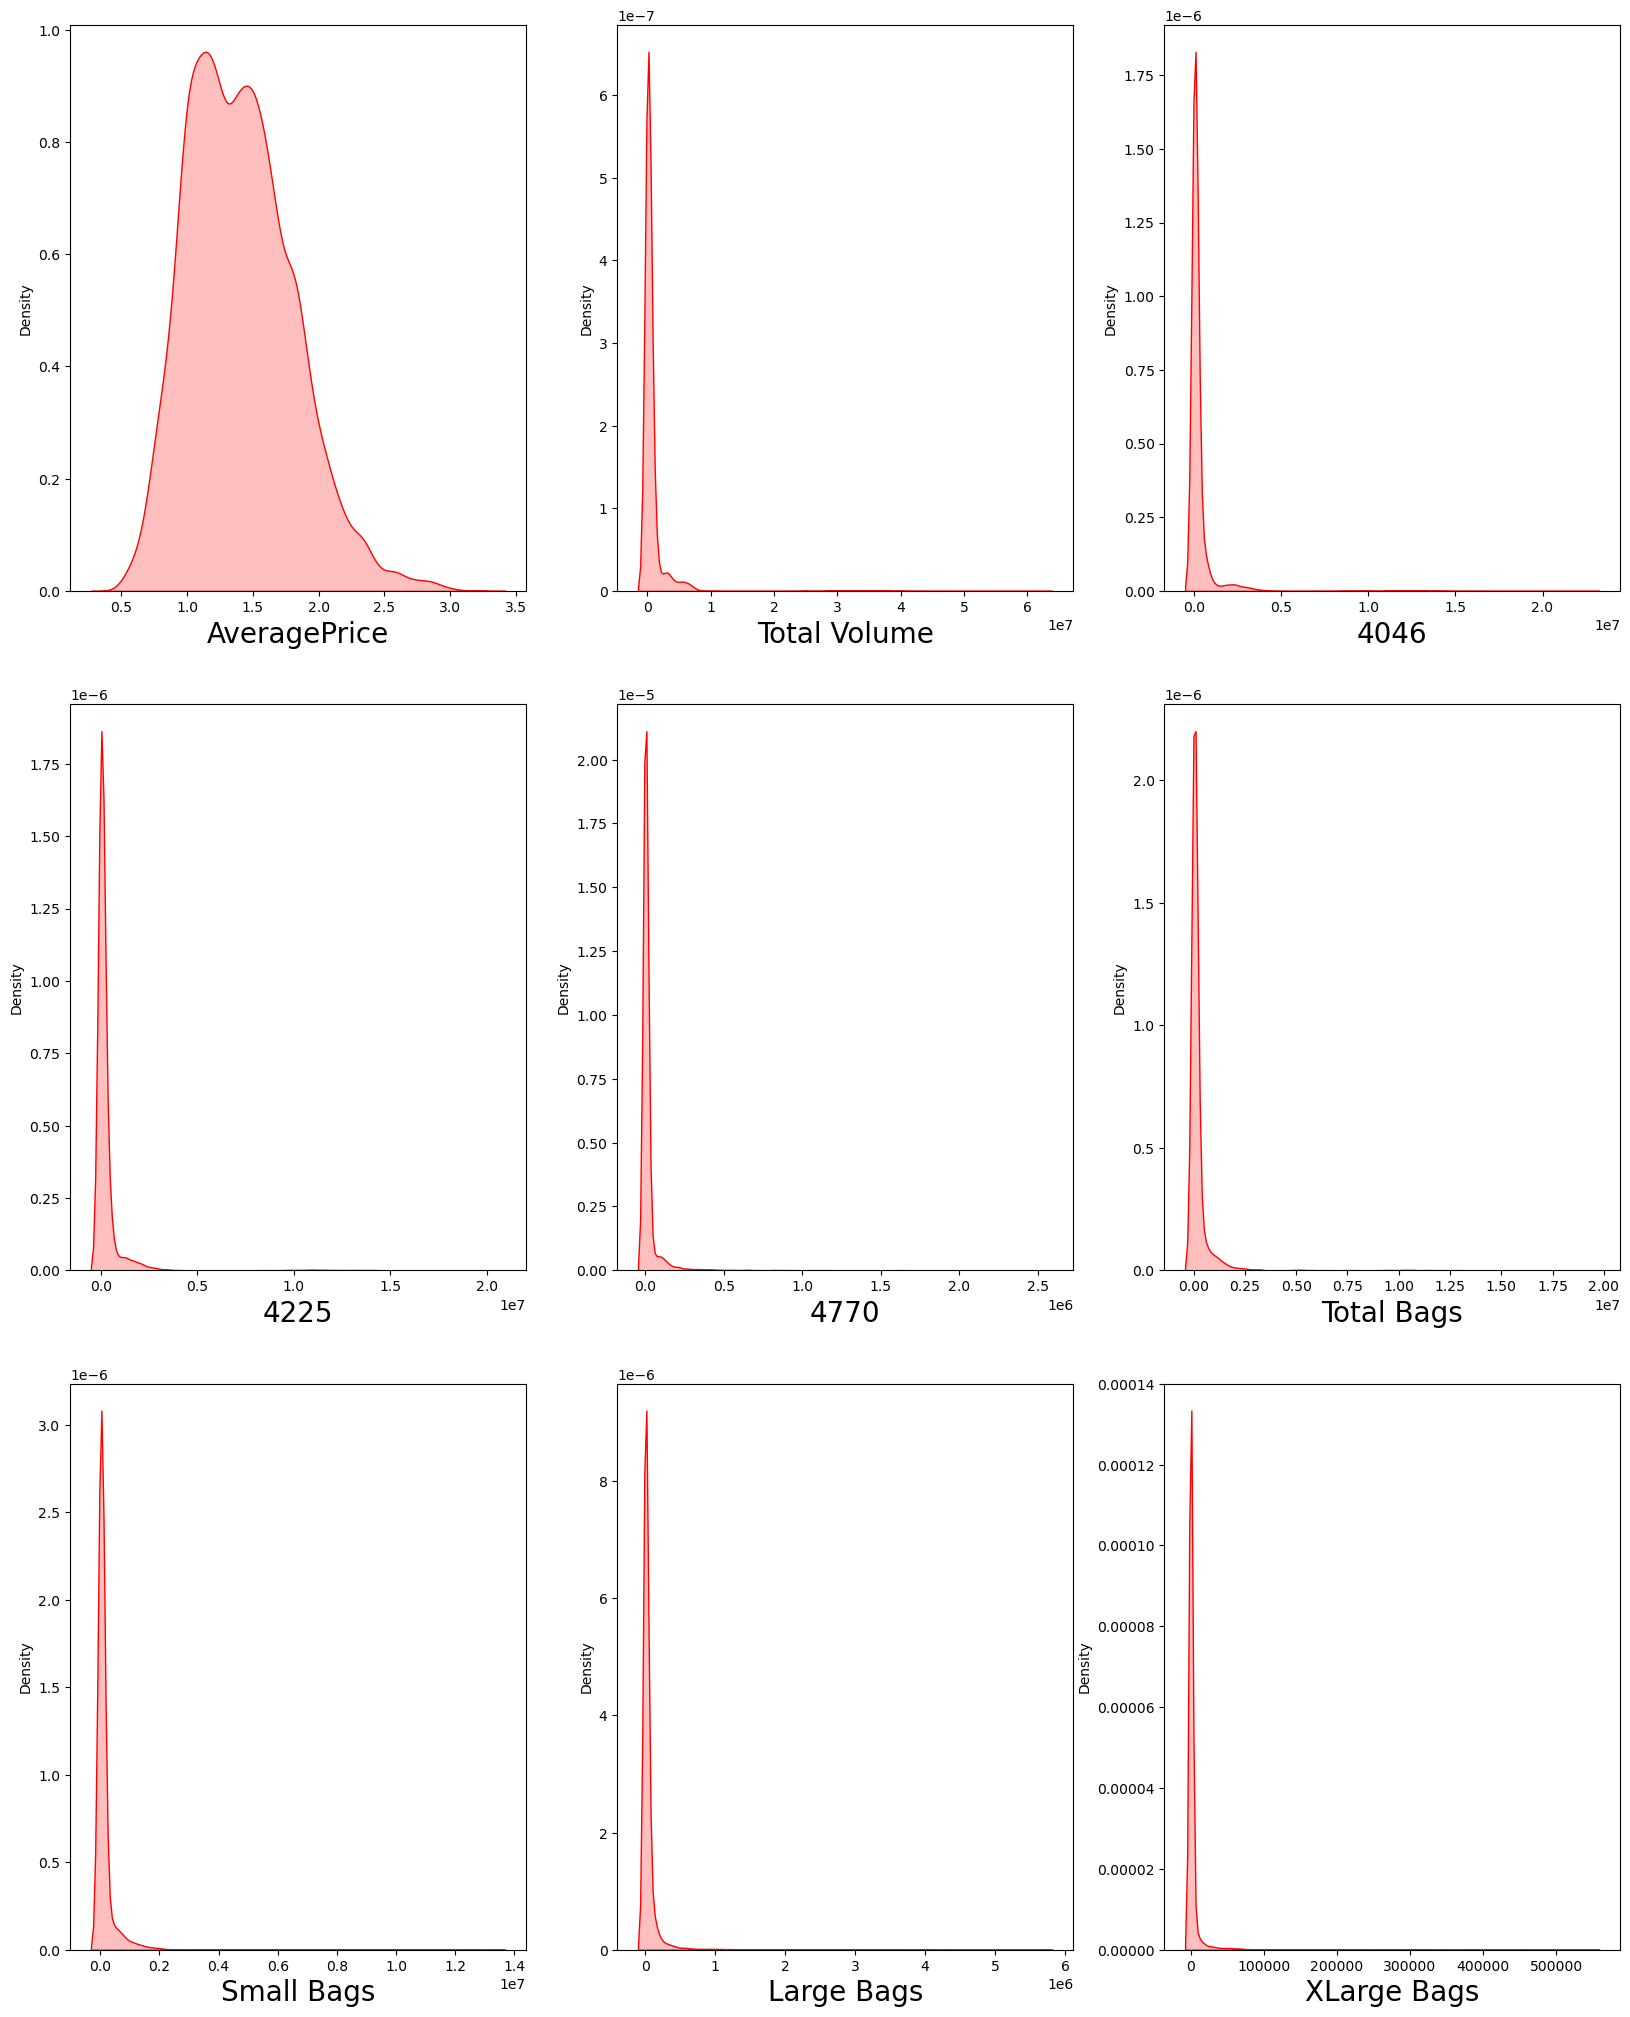

In [37]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column],color='red',hist=False,kde_kws={'shade':True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

. We can see skewed data with presence of outliers with sharp peaks. Most of plots are right skewed. Very few data points are present as we move from zero to other end of the x-axis.

Avocado availability and price vary over the year according to seasonal changes. 

Let's check the variation in avgerage price and sales volume over each month.

In [38]:
# Let's create anither copy dataframe and split date column it into year,month and day.
df2=df.copy()
df2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [48]:
df2['Day']=df2['Date'].dt.day
df2['Month']=df2['Date'].dt.month
df2['Year']=df2['Date'].dt.year
df2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,Year
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast,4,1,2015
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago,4,1,2015
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton,4,1,2015
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh,4,1,2015
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise,4,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago,25,3,2018
9018,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral,25,3,2018
18141,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral,25,3,2018
17673,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California,25,3,2018


In [49]:
df2.drop(['Date','year'],axis=1,inplace=True)
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
11569,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,Southeast,4,1,2015
9593,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,Chicago,4,1,2015
10009,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,HarrisburgScranton,4,1,2015
1819,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,Pittsburgh,4,1,2015
9333,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,Boise,4,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,Chicago,25,3,2018
9018,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,SouthCentral,25,3,2018
18141,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,SouthCentral,25,3,2018
17673,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,California,25,3,2018


In [50]:
# Converting datetype datatype into int
df2['Day']=df2['Day'].astype(int)
df2['Month']=df2['Month'].astype(int)
df2['Year']=df2['Year'].astype(int)


In [53]:
df2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
11569,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,Southeast,4,1,2015
9593,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,Chicago,4,1,2015
10009,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,HarrisburgScranton,4,1,2015
1819,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,Pittsburgh,4,1,2015
9333,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,Boise,4,1,2015


# Univariant Analysis

In [54]:
# Checking unique valuea and yearwise total no sale entries
df2['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

### Checking Monthwise sales entries

<Axes: xlabel='Month', ylabel='count'>

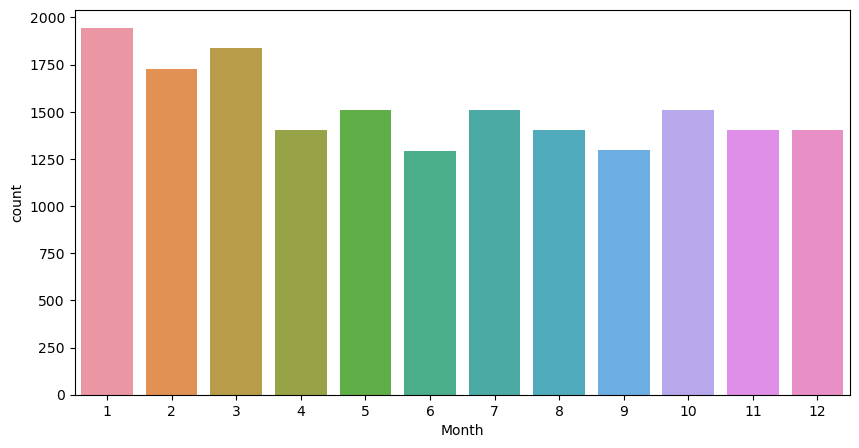

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month',data=df2)

In [61]:
df2['Month'].value_counts().max()

1944

In [63]:
df2['Month'].value_counts().min()

1294

maximum sales lead comes in month of Jan,Feb,March.

maximum sales demand of Avocado is in the month of Jan(1944) and minimum sales demand of Avocado is in the month of June.

### Checking monthwise variation in Average price

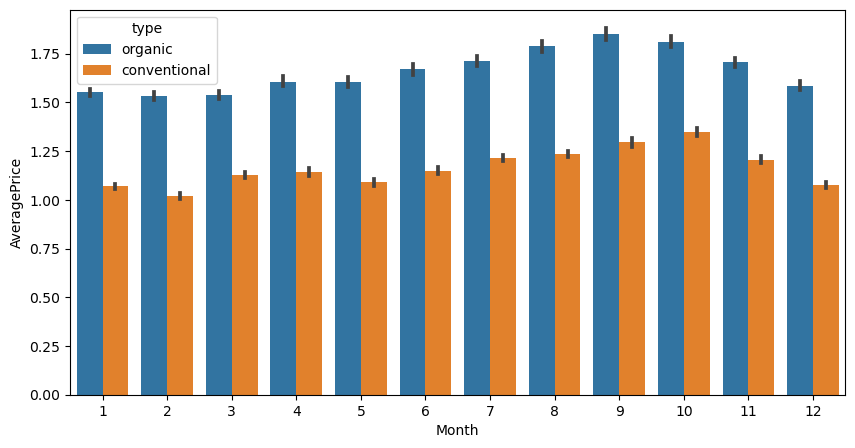

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='AveragePrice', hue='type',data=df2)
plt.show()

In [67]:
df2.groupby(['Month','type'])['AveragePrice'].agg([np.mean])

mean
Month type                  
1     conventional  1.069095
      organic       1.552942
2     conventional  1.017315
      organic       1.531458
3     conventional  1.126209
      organic       1.538301
4     conventional  1.142350
      organic       1.606410
5     conventional  1.089577
      organic       1.603624
6     conventional  1.149198
      organic       1.669536
7     conventional  1.212487
      organic       1.711667
8     conventional  1.235399
      organic       1.789630
9     conventional  1.294738
      organic       1.850571
10    conventional  1.349339
      organic       1.810026
11    conventional  1.206054
      organic       1.705071
12    conventional  1.077393
      organic       1.585193

There is not so much increase in the Organic type avocado over year period and we can also see the variation in mean price values.

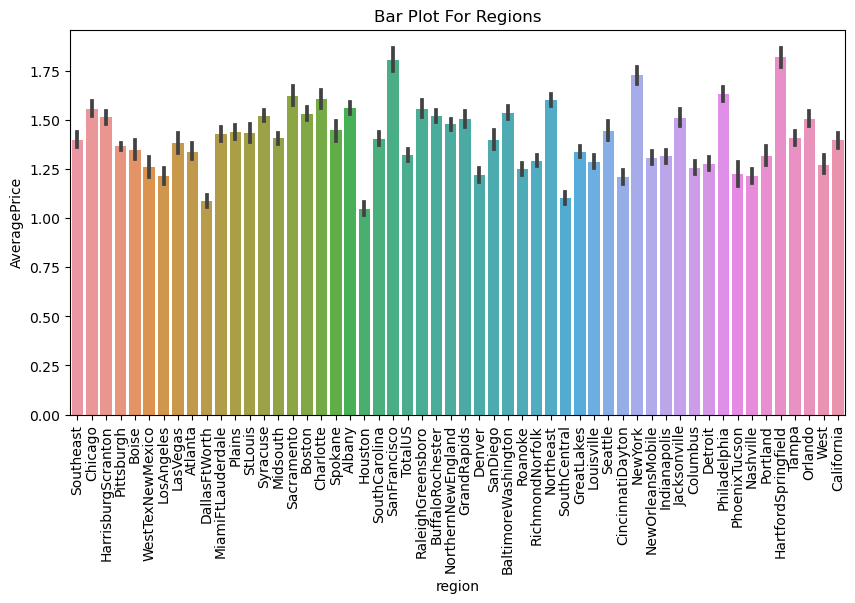

In [69]:
# Let's see region feature
plt.figure(figsize=(10,5))
sns.barplot(x='region',y='AveragePrice',data=df2)
plt.title('Bar Plot For Regions')
plt.xticks(rotation=90)
plt.show()

In [70]:
df.groupby('region')['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
,mean,mean,mean,mean,mean
region,,,,,
Albany,4.753787e+04,7.929747e+03,6.647765e+03,1.153496e+03,128.488639
Atlanta,2.621453e+05,8.449856e+04,5.160573e+04,3.207004e+04,822.786036
BaltimoreWashington,3.985619e+05,1.044561e+05,1.009397e+05,2.903985e+03,612.382722
Boise,4.264257e+04,1.597459e+04,1.384004e+04,2.103634e+03,30.915207
Boston,2.877929e+05,6.359609e+04,5.890659e+04,4.438365e+03,251.124231
BuffaloRochester,6.793630e+04,3.435134e+04,3.037998e+04,3.729050e+03,242.313432
California,3.044324e+06,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929
Charlotte,1.051939e+05,3.460930e+04,3.149069e+04,2.912684e+03,205.927781


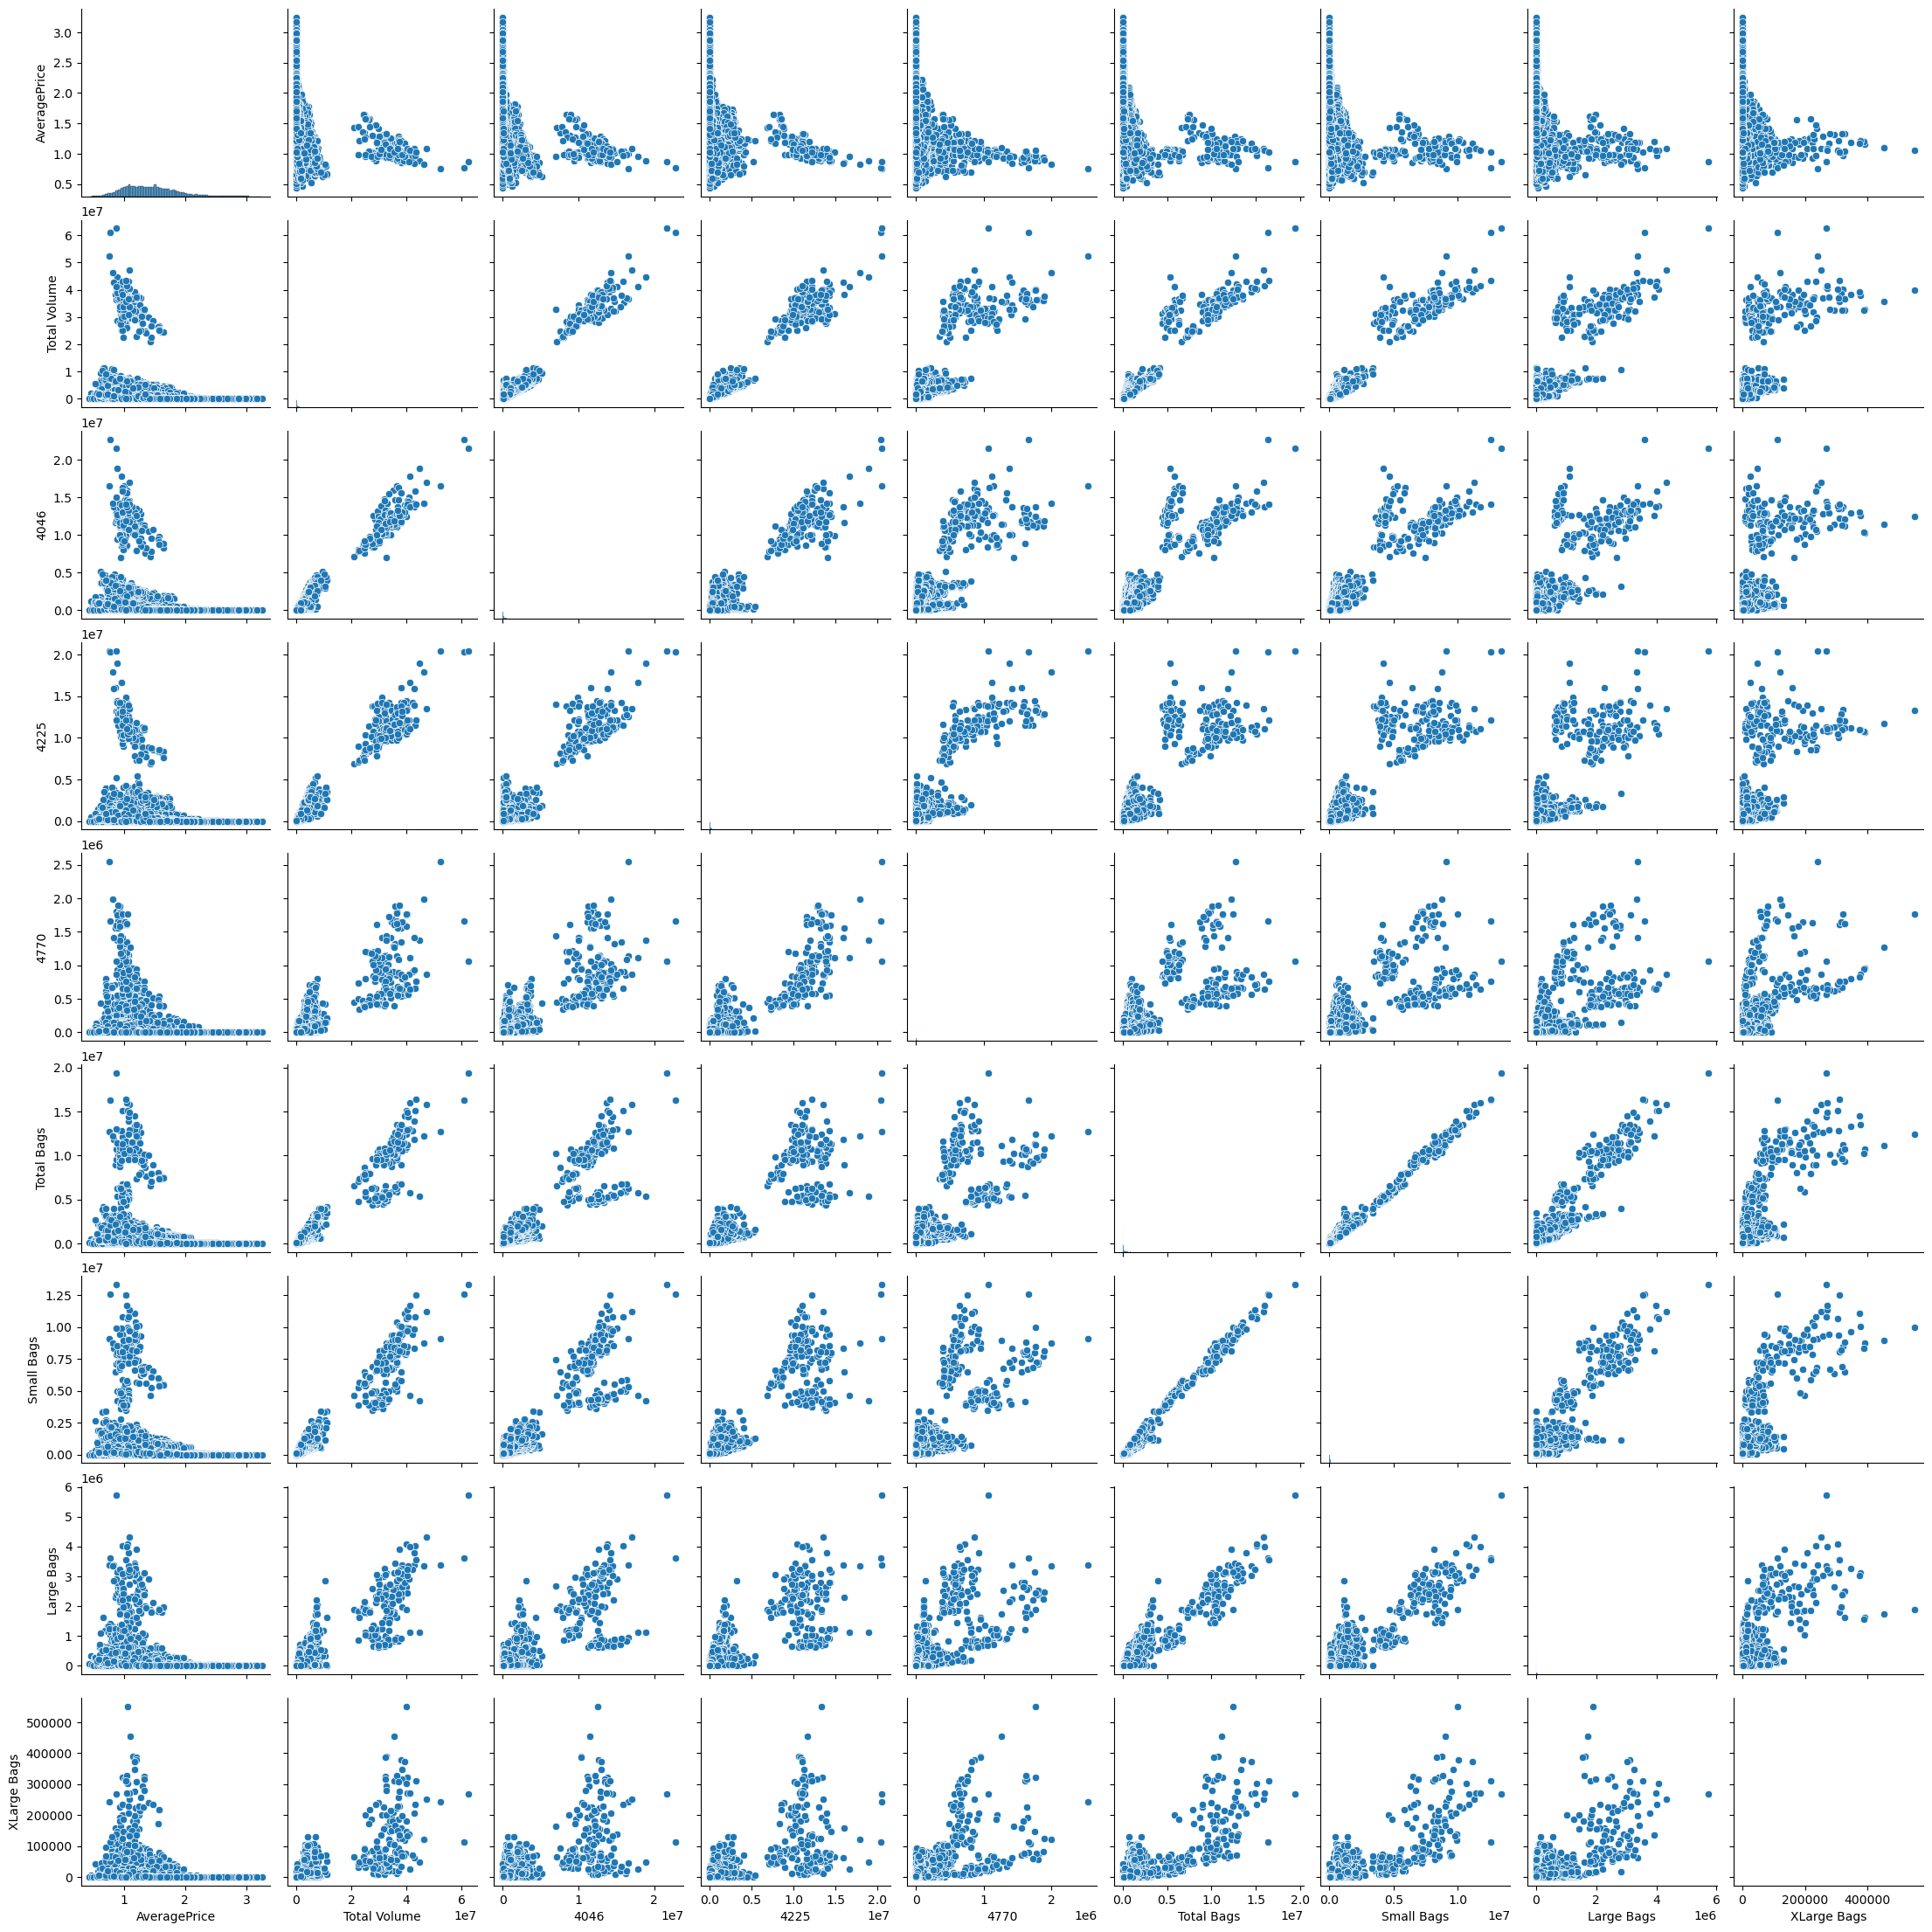

In [77]:
# Pairplot
sns.pairplot(df1)

## Encodong categorical data

In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['region']=le.fit_transform(df2['region'])
df2['type']=le.fit_transform(df2['type'])
df2


,level_0,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,0,11569,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,1,46,4,1,2015
1,1,9593,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,1,8,4,1,2015
2,2,10009,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,1,16,4,1,2015
3,3,1819,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,0,34,4,1,2015
4,4,9333,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,1,3,4,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,18244,8574,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,0,8,25,3,2018
18245,18245,9018,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,0,45,25,3,2018
18246,18246,18141,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,1,45,25,3,2018
18247,18247,17673,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,1,6,25,3,2018


In [101]:
df2.drop('index',axis=1,inplace=True)
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,1,46,4,1,2015
1,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,1,8,4,1,2015
2,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,1,16,4,1,2015
3,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,0,34,4,1,2015
4,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,1,3,4,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,0,8,25,3,2018
18245,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,0,45,25,3,2018
18246,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,1,45,25,3,2018
18247,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,1,6,25,3,2018


## Outliers detection and removel

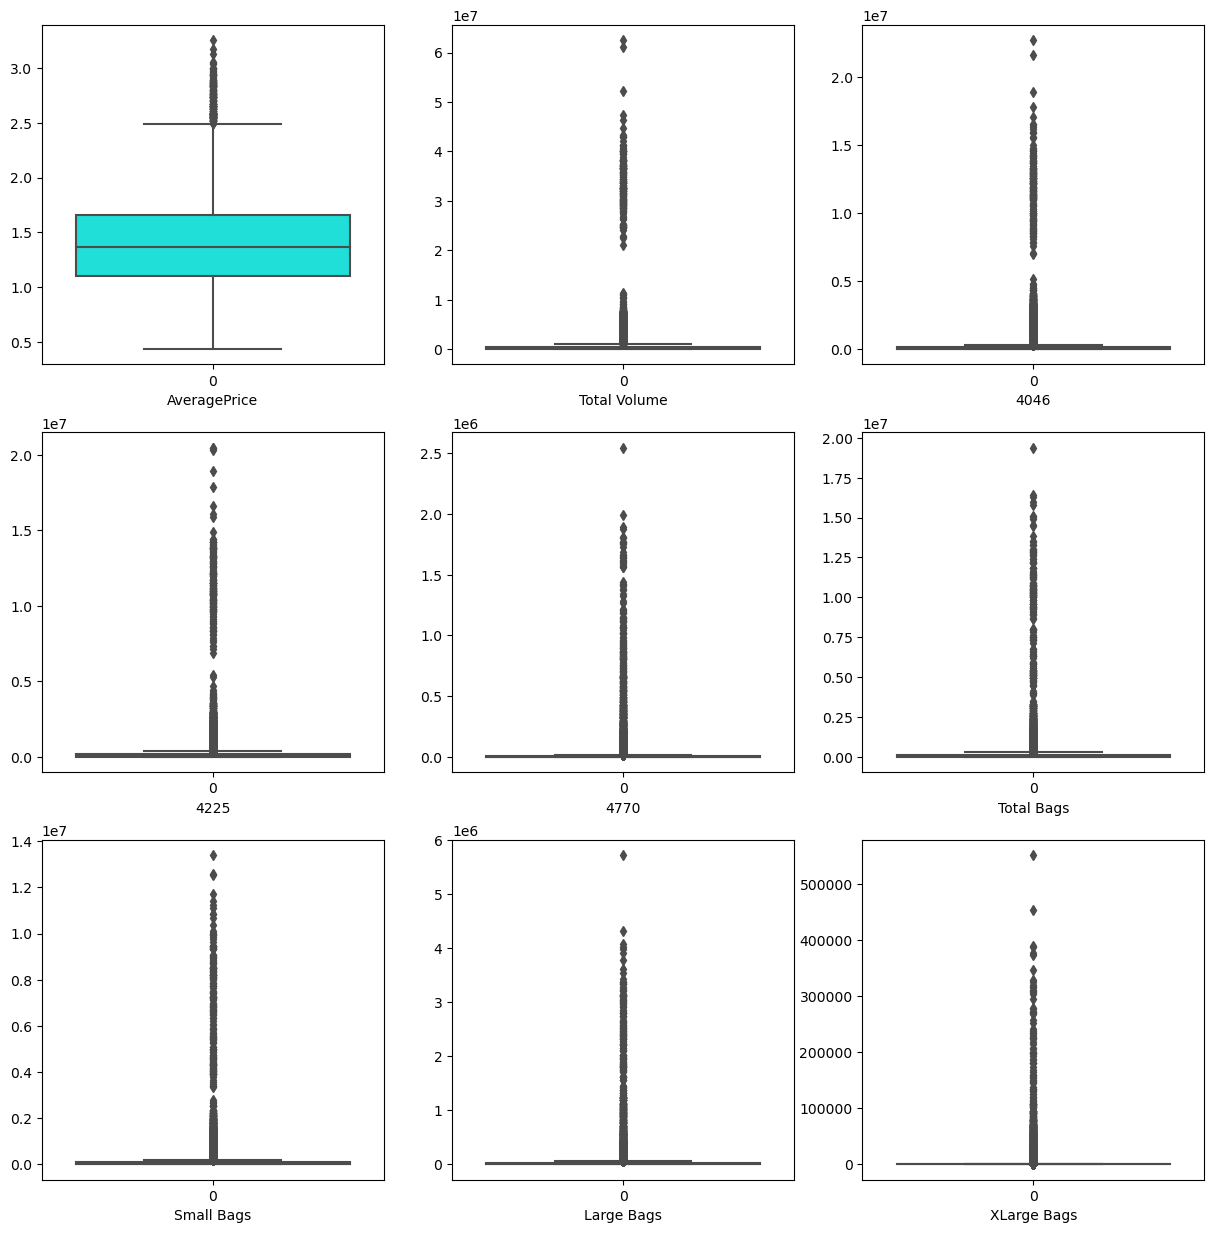

In [105]:
plt.figure(figsize=(15,15))
plotnumber=1
for column in df1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[column],palette='hsv')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [106]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
threshold=3
df3=df2[(z<3).all(axis=1)]

In [107]:
df3.shape

(17651, 14)

In [109]:
print('Data loss percentage :',((18249-17651)/18249)*100,'%')

Data loss percentage : 3.276891884486821 %


## Correlation

In [110]:
df3.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,-0.003242,0.026819,0.149502,0.091704
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,0.076676,-0.006010,-0.018645,-0.004866
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,0.119067,-0.007401,-0.015797,-0.034636
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,0.011002,-0.009520,-0.019844,-0.040234
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.095972,0.000920,-0.027245,-0.082054
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.085892,0.003311,-0.010916,0.103442
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.065976,0.005159,-0.013018,0.086639
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.127635,-0.004182,-0.001457,0.119543
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,-0.044338,0.010532,0.002843,0.108209
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.018409,-0.002287,-0.009499,0.003867


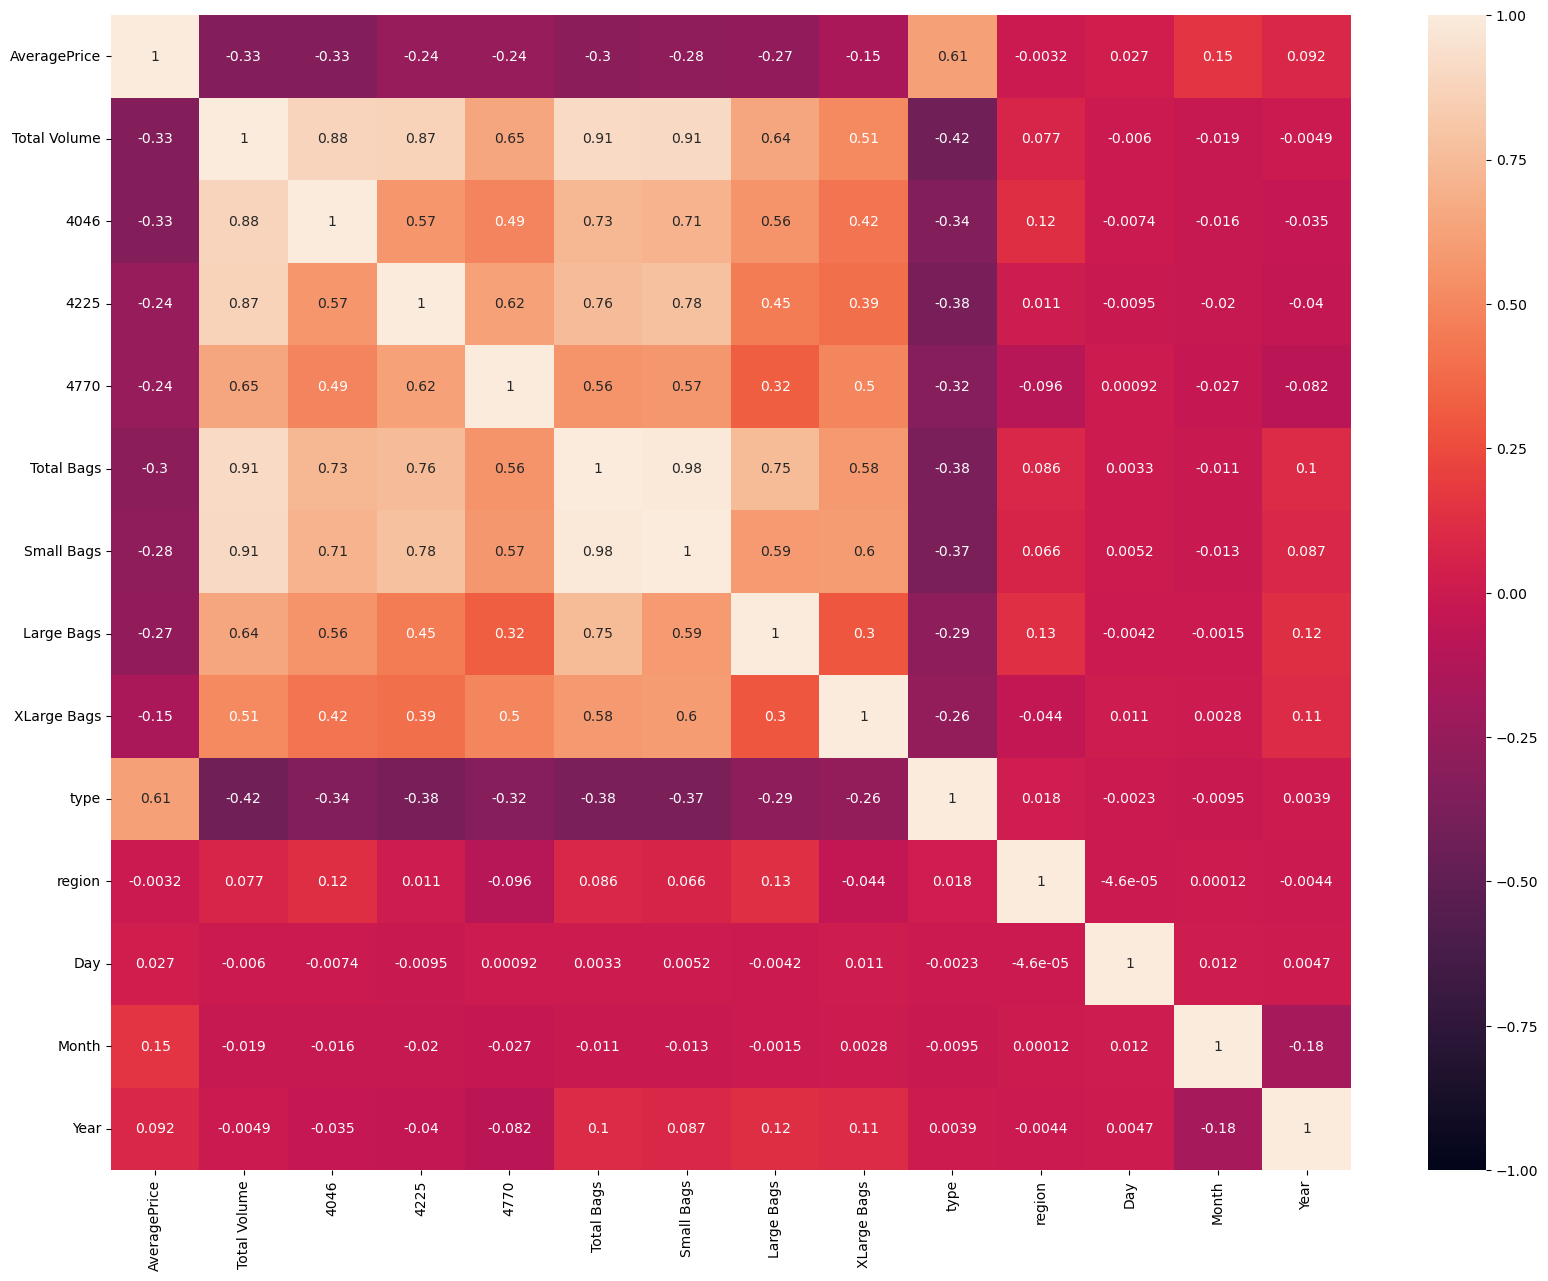

In [112]:
plt.figure(figsize=(20,15),facecolor='w')
sns.heatmap(df3.corr(),vmin=-1,vmax=1, annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


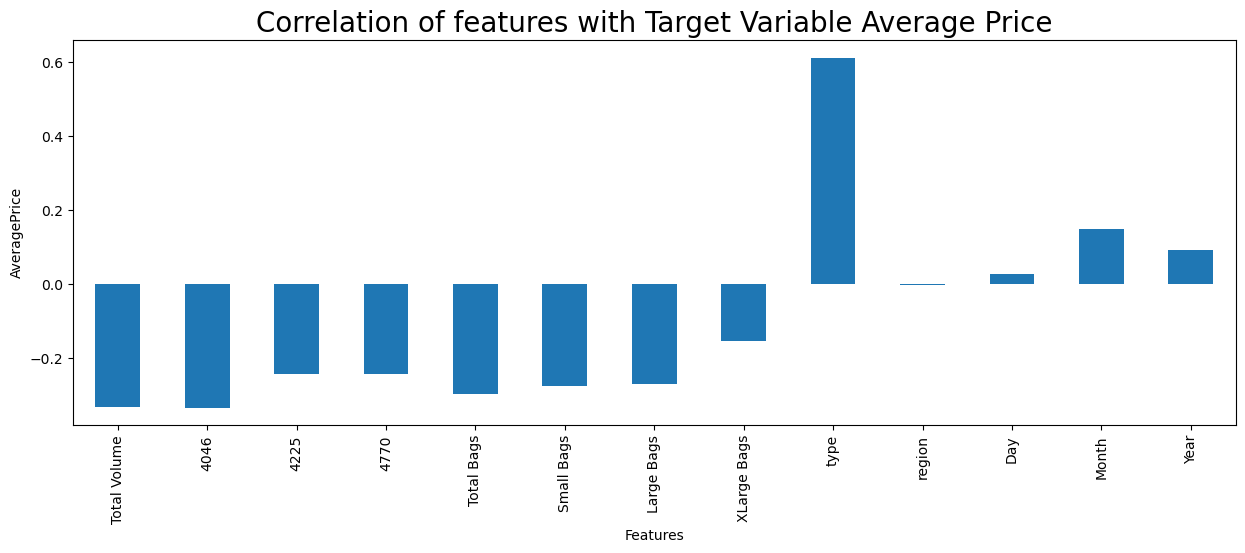

In [113]:
plt.figure(figsize=(15,5),facecolor='w')
df3.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Features',fontsize=10)
plt.ylabel('AveragePrice',fontsize=10)
plt.title('Correlation of features with Target Variable Average Price',fontsize=20)
plt.show()

#### All features are highly negatively correlated with the target variable. But only type, month and year are in posstive correlation with the target.
#### small bags are highly correlated with total bags as most of the bags are small.
#### We are going to drop some of the columns which are not related with the target variable.



In [117]:
df3

,AveragePrice,Total Volume,Small Bags,Large Bags,XLarge Bags,type,Day,Month,Year
0,1.75,27365.89,13061.10,537.36,0.00,1,4,1,2015
1,1.49,17723.17,905.55,0.00,0.00,1,4,1,2015
2,1.68,2896.72,2528.08,0.00,0.00,1,4,1,2015
3,1.52,54956.80,11264.80,3660.38,0.00,0,4,1,2015
4,1.64,1505.12,186.67,187.68,0.00,1,4,1,2015
...,...,...,...,...,...,...,...,...,...
18243,1.74,38441.23,29466.95,6915.49,0.00,1,25,3,2018
18244,1.36,908202.13,103579.41,22467.04,1362.59,0,25,3,2018
18246,1.42,163496.70,109052.26,20111.10,0.00,1,25,3,2018
18247,1.70,190257.38,89424.11,207.08,0.00,1,25,3,2018


In [118]:
df3.drop('Day',axis=1,inplace=True)
df3

,AveragePrice,Total Volume,Small Bags,Large Bags,XLarge Bags,type,Month,Year
0,1.75,27365.89,13061.10,537.36,0.00,1,1,2015
1,1.49,17723.17,905.55,0.00,0.00,1,1,2015
2,1.68,2896.72,2528.08,0.00,0.00,1,1,2015
3,1.52,54956.80,11264.80,3660.38,0.00,0,1,2015
4,1.64,1505.12,186.67,187.68,0.00,1,1,2015
...,...,...,...,...,...,...,...,...
18243,1.74,38441.23,29466.95,6915.49,0.00,1,3,2018
18244,1.36,908202.13,103579.41,22467.04,1362.59,0,3,2018
18246,1.42,163496.70,109052.26,20111.10,0.00,1,3,2018
18247,1.70,190257.38,89424.11,207.08,0.00,1,3,2018


## Checking multicollinearity between features using Variance_inflation_factor

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df3.values,i) for i in range(df3.shape[1])]
vif['Features']=df3.columns
vif

,VIF,Features
0,24.367038,AveragePrice
1,7.754106,Total Volume
2,7.707277,Small Bags
3,1.970395,Large Bags
4,1.693456,XLarge Bags
5,3.643636,type
6,4.212261,Month
7,19.857116,Year


## Independent feature VIF is with in limit of 10 except year so we will drop year as it is less correlated with the target variable.

In [121]:
df3.drop('Year',axis=1,inplace=True)

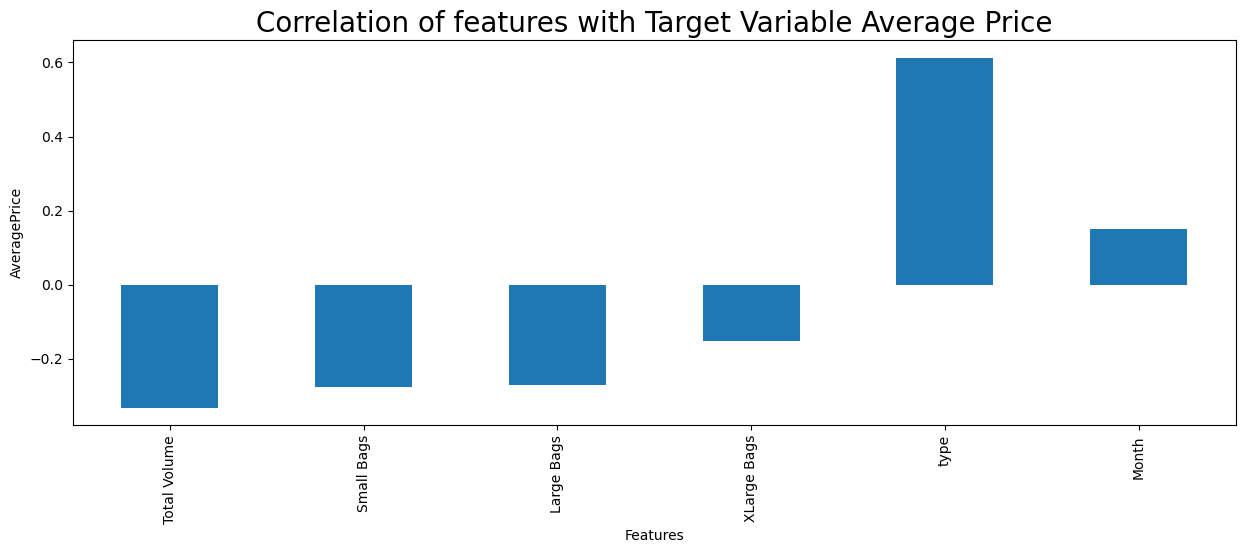

In [123]:
plt.figure(figsize=(15,5),facecolor='w')
df3.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Features',fontsize=10)
plt.ylabel('AveragePrice',fontsize=10)
plt.title('Correlation of features with Target Variable Average Price',fontsize=20)
plt.show()

## Skewness of features

In [124]:
df3.skew()

AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
Month           0.107408
dtype: float64

In [126]:
for col in df3.columns:
    if df3.skew().loc[col]>0.55:
        df3[col]=np.log1p(df3[col])

## Standard Scaling

In [130]:
X=df3.drop('AveragePrice',axis=1)
Y=df3['AveragePrice']

In [131]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)


# Machine learning Model Building

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso


In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (11826, 6)
Training target vector size: (11826,)
Test feature matrix size: (5825, 6)
Test target vector size: (5825,)


In [135]:
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)
    

Best R2 Score is 0.46818596260749945 on Random_state 776


# Linear Regression Model

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=560, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Price:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Price:'+'\033[0m\n',Y_test)

Predicted Price:
 [1.34867941 1.01813542 1.20053276 ... 1.17852004 1.01386909 1.02949586]


Actual Price:
 9409     1.48
6167     0.69
4512     0.83
3627     1.87
14802    1.56
         ... 
14681    1.98
8241     1.04
14506    1.34
17049    1.20
5892     1.05
Name: AveragePrice, Length: 4413, dtype: float64


## Linear regression Evaluation matrix

In [139]:
print('Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('R2 Score :')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))


Error :
Mean absolute error : 0.22638482998129172
Mean squared error : 0.08190209768071244
Root Mean Squared Error: 0.28618542534642194


R2 Score :
0.4433027161716574


## Cross Validation

In [140]:
# Cross validation
from sklearn.model_selection import cross_val_score
score= cross_val_score(lin_reg,X_scale,Y,cv=3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

      

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.32615797450611933


# Other Regression Models,Evaluation and cross validation

In [142]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
knn=KNeighborsRegressor()
ls= Lasso()
rd=Ridge()
model = [rf,ls,rd,svr,dtc,adb,gradb,knn]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('Error of ', m,':')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m,X_scale, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('======================================================================================================')




Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 0.20158698674576248
Mean squared error : 0.06597532594212907
Root Mean Squared Error: 0.25685662526423


 R2 Score :
0.5515586805254418


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.332996682590752


Error of  Lasso() :
Mean absolute error : 0.3128581149919408
Mean squared error : 0.14713906617958405
Root Mean Squared Error: 0.38358710377120875


 R2 Score :
-0.00011990909608994293


Cross Validation Score : Lasso() :

Mean CV Score : -0.09477213508565735


Error of  Ridge() :
Mean absolute error : 0.22638471256045986
Mean squared error : 0.08190188556509133
Root Mean Squared Error: 0.2861850547549458


 R2 Score :
0.443304157944133


Cross Validation Score : Ridge() :

Mean CV Score : 0.3578636138219281


Error of  SVR() :
Mean absolute error : 0.1953347557446976
Mean squared error : 0.06454346464914741
Root Mean Squared Error: 0.2540540585173

### Among all the models kNeighborsRegressor gives maximum R2 score i.e. 0.6058 .

# Final Model

In [174]:
Final_mod =knn
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.18104554724677088
Mean squared error : 0.05798478042148199
Root Mean Squared Error: 0.24080029157266813


 R2 Score of Final Model :
0.6058712697462001




# Saving model

In [177]:
import joblib
joblib.dump(Final_mod,'Avocado_Final_mod.csv')

['Avocado_Final_mod.csv']